# Historical VaR

### Setting Time Range and Tickers

First, let’s set the time range to a certain number of years and create a list of tickers we want to analyze. In this example, we’ll analyze the past 15 years of stock data.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

C:\Users\edfra\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\edfra\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\edfra\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Downloading Adjusted Close Prices

Next, we will download the daily adjusted close prices for each ticker in our list using the yfinance library.

In [2]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2009-03-10   54.230042  49.372162   88.139999   23.881531   27.107616
2009-03-11   54.583195  49.476063   89.220001   24.248541   27.205917
2009-03-12   56.732273  49.586533   91.099998   25.052452   28.324999
2009-03-13   57.175617  49.547562   91.300003   25.113619   28.627457
2009-03-16   57.002777  49.515079   90.800003   24.694187   28.468662
...                ...        ...         ...         ...         ...
2024-02-28  506.260010  71.898331  188.339996  435.269989  251.520004
2024-02-29  508.079987  7

### Calculating Daily Log Returns and Dropping NAs

Once we have the adjusted close prices, we can calculate the daily log returns for each stock and drop any NAs from the resulting DataFrame.

In [3]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-03-11  0.006491  0.002102  0.012179  0.015251  0.003620
2009-03-12  0.038617  0.002230  0.020853  0.032615  0.040310
2009-03-13  0.007784 -0.000786  0.002193  0.002439  0.010622
2009-03-16 -0.003028 -0.000656 -0.005492 -0.016842 -0.005562
2009-03-17  0.030125 -0.002233 -0.008405  0.037164  0.031117
...              ...       ...       ...       ...       ...
2024-02-28 -0.001323  0.002222  0.001807 -0.005339 -0.001668
2024-02-29  0.003588  0.001663  0.005137  0.008533  0.004206
2024-03-01  0.009344  0.004185  0.018734  0.014945  0.009143
2024-03-04 -0.001073 -0.002353  0.016046 -0.003575 -0.000981
2024-03-05 -0.010044  0.005391  0.006002 -0.018113 -0.010659

[3772 rows x 5 columns]


### Creating a Weighted Portfolio

Now, we’ll create a weighted portfolio with a total value of $1,000,000.

In [4]:
portfolio_value = 1000000

weights = np.array([0.1, 0.15, 0.20, 0.25, 0.30])

#weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.1  0.15 0.2  0.25 0.3 ]


### Calculating Historical Portfolio Returns

With the weights defined, we can now calculate the historical portfolio returns.

In [5]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2009-03-11    0.008299
2009-03-12    0.028614
2009-03-13    0.004895
2009-03-16   -0.007379
2009-03-17    0.019623
                ...   
2024-02-28   -0.001273
2024-02-29    0.005031
2024-03-01    0.011788
2024-03-04    0.001561
2024-03-05   -0.006721
Length: 3772, dtype: float64


### Finding X-Day Historical Returns

Next, we’ll find the X-day historical returns. In this example, we’ll use a 1-day window.

In [6]:
days = 1

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2009-03-11    0.008299
2009-03-12    0.028614
2009-03-13    0.004895
2009-03-16   -0.007379
2009-03-17    0.019623
                ...   
2024-02-28   -0.001273
2024-02-29    0.005031
2024-03-01    0.011788
2024-03-04    0.001561
2024-03-05   -0.006721
Length: 3772, dtype: float64


### Calculating VaR Using the Historical Method

Now, we can specify a confidence interval and calculate the Value at Risk (VaR) using the historical method.

In [7]:
#confidence_interval = 0.95
#VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
#print(VaR)

In [8]:
confidence_interval = [0.90, 0.95, 0.99]
significance = [10,5,1]


VaRs = []
for ci in significance:
    VaR = -np.percentile(range_returns, significance)*portfolio_value
    VaRs.append(VaR)

In [9]:
VaR

array([ 8424.16091956, 12433.53716386, 22004.20394261])

In [10]:
Historical_VaR=VaR

In [11]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)


for ci, VaR in zip(confidence_interval, VaR):
    print(f'{ci * 100:>6.0f}%: {"":<8} ${VaR.astype(float):>10,.2f}')
    #print(f'{ci * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $  8,424.16
    95%:          $ 12,433.54
    99%:          $ 22,004.20


### Plotting the Results of the Historical Returns

Finally, let’s plot the results of the historical returns to visualize the distribution of portfolio returns and the VaR at the specified confidence level.

In [12]:
#return_window = days
#range_returns = historical_returns.rolling(window=return_window).sum()
#range_returns = range_returns.dropna()

#range_returns_dollar = range_returns * portfolio_value

#plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
#plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
#plt.ylabel('Frequency')
#plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
#plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
#plt.legend()
#plt.show()

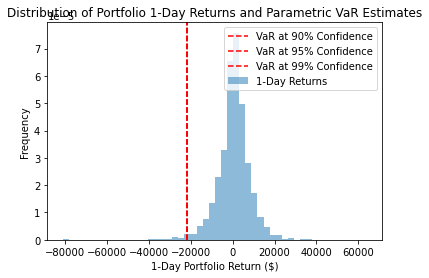

In [13]:
#return_window = days
#range_returns = historical_returns.rolling(window=return_window).sum()
#range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

# Plot the histogram
plt.hist(range_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for ci, VaR_ in zip(confidence_interval, VaRs):
    plt.axvline(x=-VaR, linestyle='--', color='r', label='VaR at {}% Confidence'.format(int(ci * 100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

In a Five-Day Period at a 95 level of confidence the worst thing that could happen at worth fifth percentile is we'd lose about 25861 usd.

# Parametric VaR

We will find the rolling sum of historical returns for a specified number of days:

In [14]:
days = 1
historical_x_day_returns = historical_returns.rolling(window=days).sum()

### Create Covariance Matrix and Calculate Portfolio Standard Deviation

Now, we will create a covariance matrix for all the securities and calculate the portfolio standard deviation:

In [15]:
cov_matrix = log_returns.cov() * 252 #252 because it's 252 days in trade
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

### Calculate VaR at Different Confidence Levels

We will calculate the Value at Risk (VaR) at different confidence levels:

In [16]:
from scipy.stats import norm

confidence_levels = [0.90, 0.95, 0.99]

VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * portfolio_std_dev * norm.ppf(cl) * np.sqrt(days / 252)
    VaRs.append(VaR)

### Print VaR Results

Let’s print the VaR results for each confidence level:

In [17]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $ 10,315.20
    95%:          $ 13,239.41
    99%:          $ 18,724.75


### Plot the Distribution of Portfolio Returns and Parametric VaR Estimates

Finally, we will plot the distribution of the X-day portfolio returns and the parametric VaR estimates:

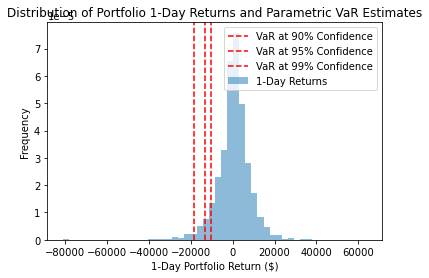

In [18]:
# Convert returns to dollar values for the histogram
historical_x_day_returns_dollar = historical_x_day_returns * portfolio_value

# Plot the histogram
plt.hist(historical_x_day_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for cl, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x=-VaR, linestyle='--', color='r', label='VaR at {}% Confidence'.format(int(cl * 100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

# cVaR

In [19]:
con=[0,1,2]
Historical_VaR= Historical_VaR/1000000
cVaRs = []
for c in con:
    cVaR = -np.mean(range_returns[range_returns < -Historical_VaR[c]])*portfolio_value
    cVaRs.append(cVaR)

In [20]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

for cl, cVaR in zip(confidence_levels, cVaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${cVaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $ 14,646.07
    95%:          $ 19,130.76
    99%:          $ 31,551.30


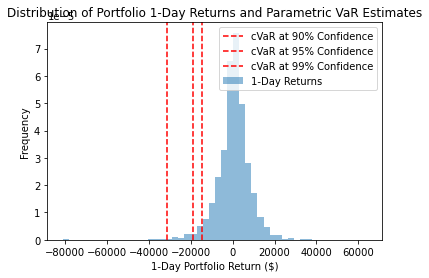

In [21]:
range_returns_dollar = range_returns * portfolio_value

# Plot the histogram
plt.hist(range_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for ci, cVaR in zip(confidence_interval, cVaRs):
    plt.axvline(x=-cVaR, linestyle='--', color='r', label='cVaR at {}% Confidence'.format(int(ci * 100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

## VaR through MonteCarlo Simulation

In [22]:
### Set time from to a certain number of years
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

### Create a list of tickers
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [23]:
### Download the daily adjusted close prices for the tickers
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2009-03-10   54.230042  49.372120   88.139999   23.881540   27.107605
2009-03-11   54.583191  49.476112   89.220001   24.248549   27.205904
2009-03-12   56.732235  49.586517   91.099998   25.052450   28.324987
2009-03-13   57.175606  49.547573   91.300003   25.113623   28.627459
2009-03-16   57.002781  49.515064   90.800003   24.694187   28.468658
...                ...        ...         ...         ...         ...
2024-02-28  506.260010  71.898331  188.339996  435.269989  251.520004
2024-02-29  508.079987  7

In [24]:
### Calculate the daily log returns and drop any NAs
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns  = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-03-11  0.006491  0.002104  0.012179  0.015251  0.003620
2009-03-12  0.038617  0.002229  0.020853  0.032615  0.040310
2009-03-13  0.007785 -0.000786  0.002193  0.002439  0.010622
2009-03-16 -0.003027 -0.000656 -0.005492 -0.016843 -0.005563
2009-03-17  0.030125 -0.002233 -0.008405  0.037164  0.031117
...              ...       ...       ...       ...       ...
2024-02-28 -0.001323  0.002222  0.001807 -0.005339 -0.001668
2024-02-29  0.003588  0.001663  0.005137  0.008533  0.004206
2024-03-01  0.009344  0.004185  0.018734  0.014945  0.009143
2024-03-04 -0.001073 -0.002353  0.016046 -0.003575 -0.000981
2024-03-05 -0.010044  0.005391  0.006002 -0.018113 -0.010659

[3772 rows x 5 columns]


In [25]:
### Create a function that will be used to calculate portfolio expected return *We are assuming that future returns are based on past returns, which is not a reliable assumption.
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

### Create a function that will be used to calculate portfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [26]:
### Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()
print(cov_matrix)

              SPY           BND       GLD           QQQ           VTI
SPY  1.235297e-04 -4.356883e-07  0.000007  1.338802e-04  1.260819e-04
BND -4.356883e-07  9.250863e-06  0.000009  4.276142e-07 -2.590029e-07
GLD  6.715267e-06  8.903255e-06  0.000098  7.114650e-06  7.244827e-06
QQQ  1.338802e-04  4.276142e-07  0.000007  1.693041e-04  1.369422e-04
VTI  1.260819e-04 -2.590029e-07  0.000007  1.369422e-04  1.297803e-04


In [27]:
### Create an equally weighted portfolio and find total portfolio expected return and standard deviation
portfolio_value = 1000000
#weights = np.array([0.1, 0.15, 0.20, 0.25, 0.30])
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

In [28]:
def random_z_score():
    return np.random.normal(0, 1)

### Create a function to calculate scenarioGainLoss
days = 20

#This function incorporates volatility
def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

In [29]:
### Run 10000 simulations
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

In [30]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.99
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

69225.42323429706


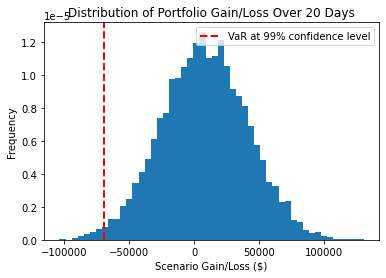

In [31]:
### Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()